## 1. Load Required Libraries

In [1]:
import src.util as utils
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## 2. Load Configuration File

In [2]:
config = utils.load_config()

## 3. Load Train and Valid Set

In [3]:
def load_train(params: dict) -> pd.DataFrame:
    # Load train set
    x_train = utils.pickle_load(params["train_set_path"][0])
    y_train = utils.pickle_load(params["train_set_path"][1])

    return x_train, y_train

def load_valid(params: dict) -> pd.DataFrame:
    # Load valid set
    x_valid = utils.pickle_load(params["valid_set_path"][0])
    y_valid = utils.pickle_load(params["valid_set_path"][1])

    return x_valid, y_valid

def load_test(params: dict) -> pd.DataFrame:
    # Load tets set
    x_test = utils.pickle_load(params["test_set_path"][0])
    y_test = utils.pickle_load(params["test_set_path"][1])

    return x_test, y_test

In [4]:
x_train, y_train = load_train(config)
x_valid, y_valid = load_valid(config)
x_test, y_test = load_test(config)

## 4. Training Model

In [5]:
dtc = DecisionTreeClassifier()

In [6]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
x_train

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical
446,0,63,85,27,11,28,28,85,2
730,2,46,31,43,10,35,11,46,1
1361,1,80,110,55,15,54,28,110,2
392,3,55,101,40,11,19,25,101,2
556,0,54,77,33,11,24,35,77,2
...,...,...,...,...,...,...,...,...,...
1245,3,60,114,39,11,16,22,114,2
869,3,64,102,41,21,40,22,102,2
691,1,64,84,26,14,46,34,84,2
62,2,55,78,47,7,24,14,78,2


[Text(0.5, 0.75, 'max <= 100.5\ngini = 0.5\nsamples = 901\nvalue = [450, 451]\nclass = y[1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 451\nvalue = [0, 451]\nclass = y[1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 450\nvalue = [450, 0]\nclass = y[0]')]

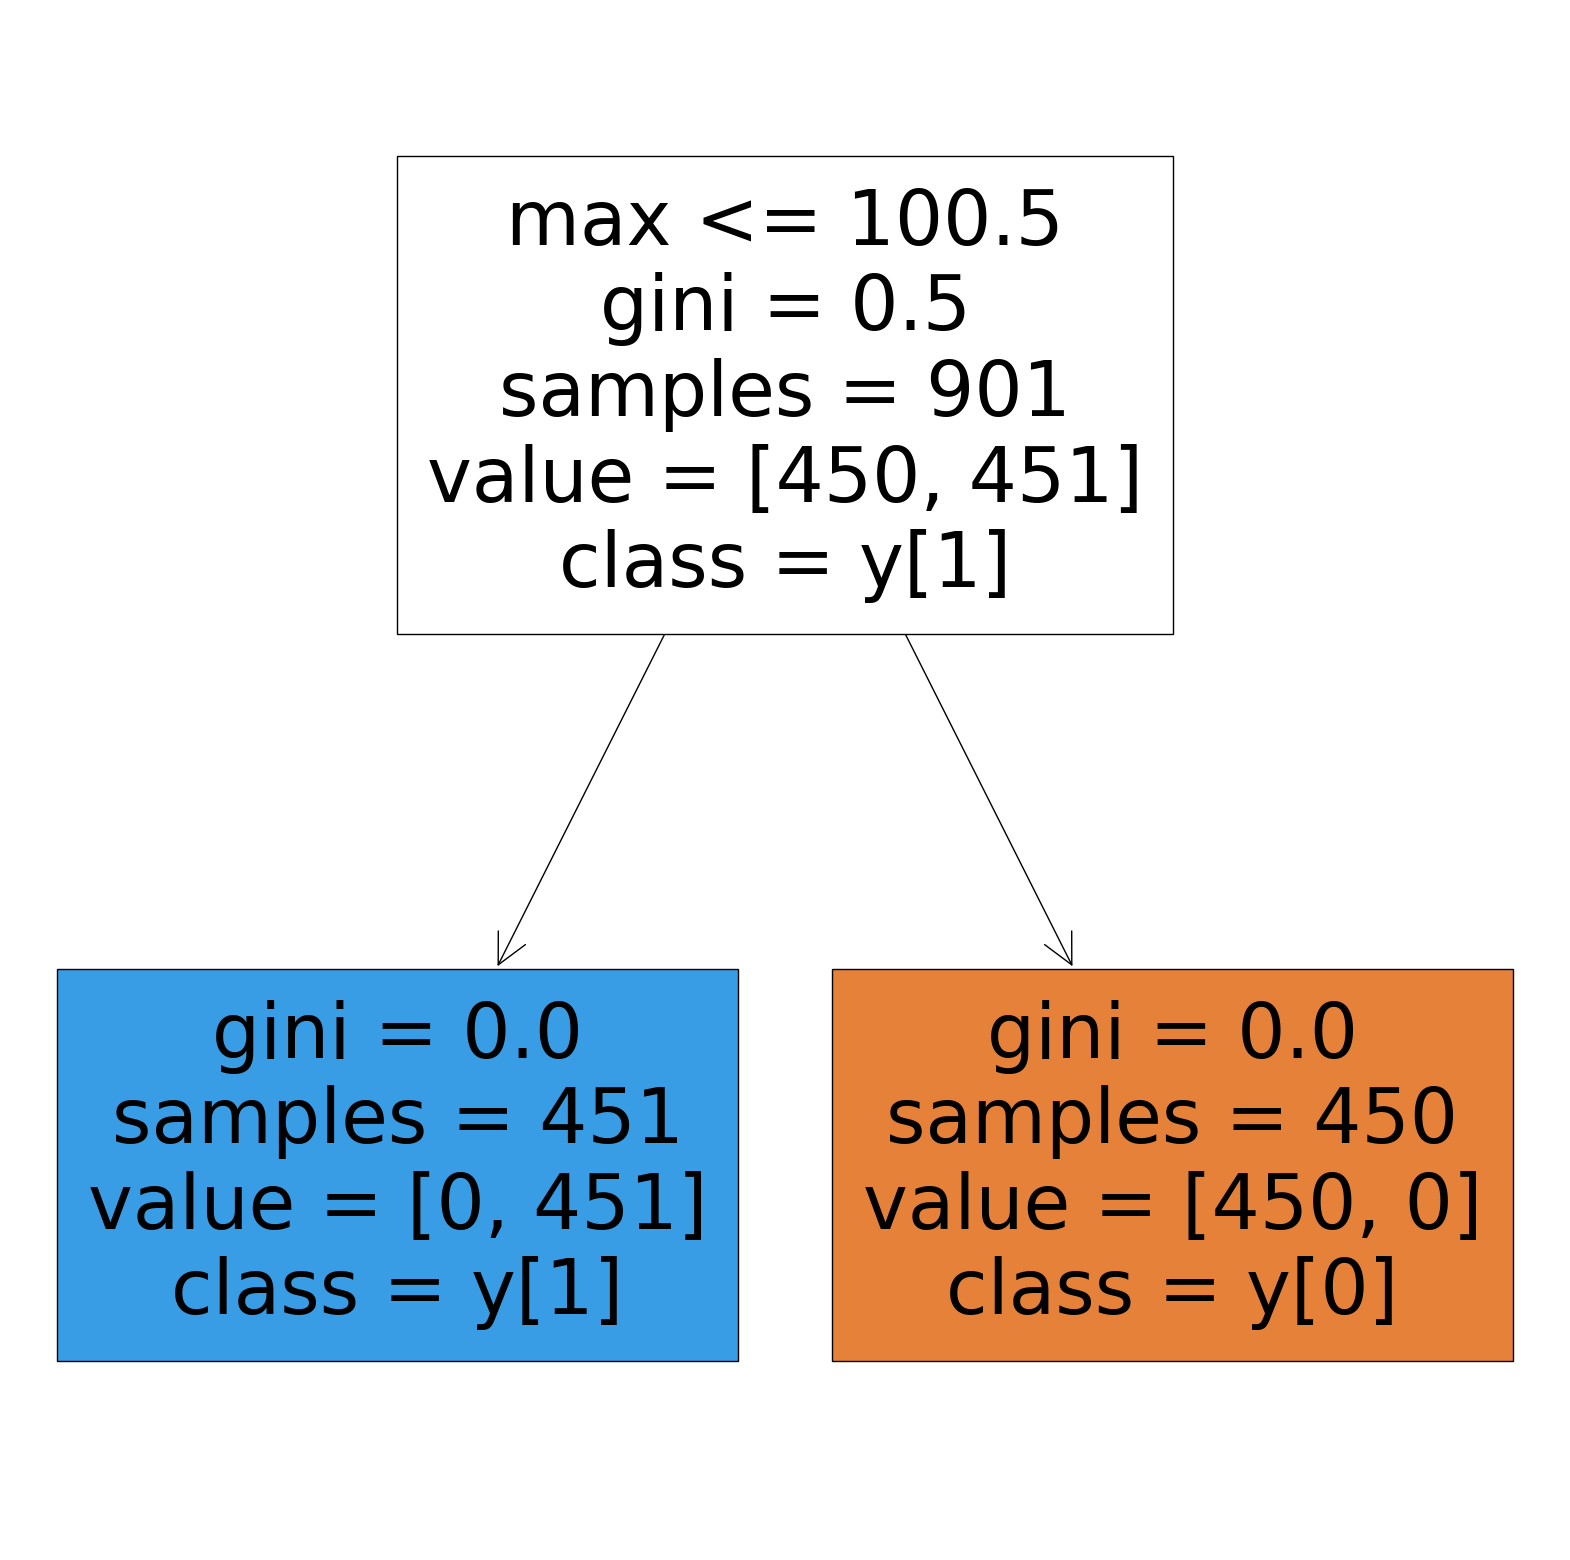

In [8]:
fig, ax = plt.subplots(figsize=(20,20)) 
tree.plot_tree(dtc, filled = True, ax = ax, feature_names = dtc.feature_names_in_, class_names = True)

## 5. Evaluation and Metrics

In [9]:
y_pred = dtc.predict(x_valid)

In [10]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       193

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387



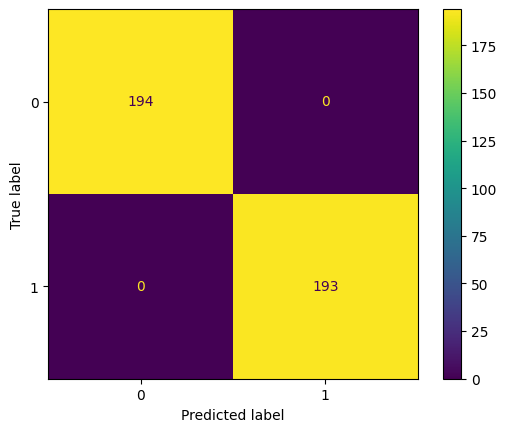

In [11]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred)

### Evaluation data validation

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


[Text(0, 0, '1'), Text(0, 0, '1'), Text(0, 0, '1'), Text(0, 0, '1')]

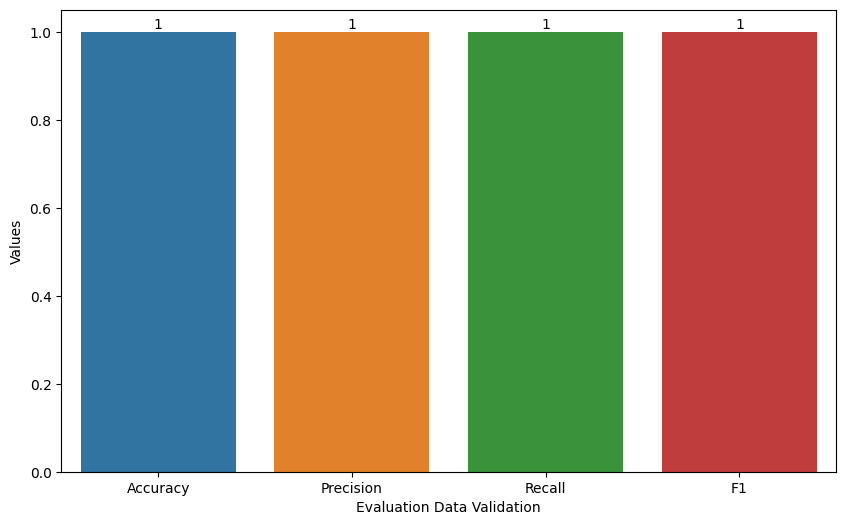

In [12]:
# Calculating accuracy
y_pred_val = dtc.predict(x_valid)

#
accuracy = accuracy_score(y_valid, y_pred_val)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_valid, y_pred_val)
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_valid, y_pred_val)
print("Recall:", recall)

# Calculating F1 score
f1 = f1_score(y_valid, y_pred_val)
print("F1 score:", f1)

eval_val = {
    'Evaluation Data Validation': ['Accuracy', 'Precision', 'Recall','F1'],
    'Values': [accuracy,precision,recall,f1],
}

# Create a DataFrame from the dictionary
eval_val = pd.DataFrame(eval_val)

#set frame
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='Evaluation Data Validation', y='Values', data=eval_val)
plt.bar_label(ax.containers[0])

### Evaluation data training

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


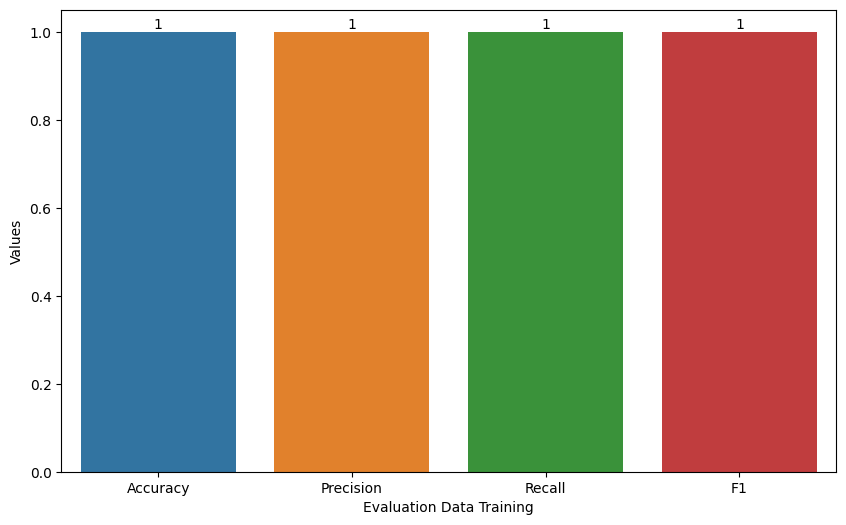

In [13]:
# Calculating accuracy
y_pred_train = dtc.predict(x_train)

#
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_train, y_pred_train)
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_train, y_pred_train)
print("Recall:", recall)

# Calculating F1 score
f1 = f1_score(y_train, y_pred_train)
print("F1 score:", f1)

eval_train = {
    'Evaluation Data Training': ['Accuracy', 'Precision', 'Recall','F1'],
    'Values': [accuracy,precision,recall,f1],
}

# Create a DataFrame from the dictionary
eval_train = pd.DataFrame(eval_train)

#set frame
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='Evaluation Data Training', y='Values', data=eval_train)
plt.bar_label(ax.containers[0])

# Show the plot
plt.show()

### Predict data testing

In [14]:
#predict data testing
x_test["predict_categori"] = dtc.predict(x_test)
test = pd.concat([x_test, y_test], axis = 1)
test

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,predict_categori,categori
96,3,62,88,35,20,19,22,88,2,1,1
373,2,57,81,44,10,33,11,81,2,1,1
1282,1,73,105,64,12,69,27,105,2,0,0
1024,1,70,102,60,10,57,17,102,2,0,0
372,2,66,100,46,11,32,15,100,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
258,4,60,103,31,13,20,27,103,2,0,0
612,2,54,76,50,8,32,14,76,2,1,1
224,2,75,29,51,14,43,21,75,1,1,1
648,3,52,80,41,18,31,23,80,2,1,1


## 6. Dump Model Object

In [15]:
utils.pickle_dump(dtc, config["production_model_path"])

In [16]:
model = utils.pickle_load("models/production_model.pkl")